In [1]:
!pip install tensorboardX

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.9 MB/s eta 0:00:00


In [2]:
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt

In [3]:
# Install the torchgeometry library
!pip install torchgeometry

# Clone the HR-VITON repository from GitHub
!git clone https://github.com/sangyun884/HR-VITON.git

# Move pretrained weights from the input directory to the output directory in Kaggle
!mkdir -p ./HR-VITON/eval_models/weights/v0.1
!cp -r /kaggle/input/hr-viton/* ./HR-VITON/eval_models/weights/v0.1/

# Move test data from the input directory to the working directory in Kaggle
!mkdir -p /kaggle/working/data/test
!cp -r "/kaggle/input/high-resolution-viton-zalando-dataset/test"/* /kaggle/working/data/test

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nv

In [4]:
import numpy as np
import pandas as pd

image =  ["00017_00.jpg", "13891_00.jpg", "02372_00.jpg", "00055_00.jpg", 
         "00057_00.jpg", "00084_00.jpg", "00190_00.jpg", "00627_00.jpg", 
         "00884_00.jpg", "00782_00.jpg", "02007_00.jpg", "02299_00.jpg", 
         "02273_00.jpg", "07874_00.jpg", "02254_00.jpg", "05338_00.jpg", 
         "10404_00.jpg", "05997_00.jpg", "08340_00.jpg", "02660_00.jpg", 
         "08321_00.jpg", "08079_00.jpg", "03797_00.jpg", "03802_00.jpg", "04096_00.jpg"]
clothes = ["04131_00.jpg", "06778_00.jpg", "07874_00.jpg", "02372_00.jpg",
           "00828_00.jpg", "05338_00.jpg", "04700_00.jpg", "00828_00.jpg", 
           "00736_00.jpg", "02007_00.jpg", "05956_00.jpg", "02007_00.jpg", 
           "12365_00.jpg", "03797_00.jpg", "05876_00.jpg", "08348_00.jpg", 
           "01248_00.jpg", "05830_00.jpg", "08512_00.jpg", "13004_00.jpg", 
           "08079_00.jpg", "08321_00.jpg", "03745_00.jpg", "04096_00.jpg","03922_00.jpg"]
df = pd.DataFrame({"image": image, "clothes": clothes})
df.to_csv("/kaggle/working/data/pairs1.txt", index=False, header=False, sep=" ")

In [5]:
! cat /kaggle/working/data/pairs1.txt

00017_00.jpg 04131_00.jpg
13891_00.jpg 06778_00.jpg
02372_00.jpg 07874_00.jpg
00055_00.jpg 02372_00.jpg
00057_00.jpg 00828_00.jpg
00084_00.jpg 05338_00.jpg
00190_00.jpg 04700_00.jpg
00627_00.jpg 00828_00.jpg
00884_00.jpg 00736_00.jpg
00782_00.jpg 02007_00.jpg
02007_00.jpg 05956_00.jpg
02299_00.jpg 02007_00.jpg
02273_00.jpg 12365_00.jpg
07874_00.jpg 03797_00.jpg
02254_00.jpg 05876_00.jpg
05338_00.jpg 08348_00.jpg
10404_00.jpg 01248_00.jpg
05997_00.jpg 05830_00.jpg
08340_00.jpg 08512_00.jpg
02660_00.jpg 13004_00.jpg
08321_00.jpg 08079_00.jpg
08079_00.jpg 08321_00.jpg
03797_00.jpg 03745_00.jpg
03802_00.jpg 04096_00.jpg
04096_00.jpg 03922_00.jpg


In [6]:
# Use sed to replace all `np.float` with `float` in test_generator.py
!sed -i 's/np\.float/float/g' /kaggle/working/HR-VITON/test_generator.py

In [7]:
!cd ./HR-VITON && python3 test_generator.py --occlusion --cuda {True} --gpu_ids {0} --dataroot /kaggle/working/data/ --data_list pairs1.txt --output_dir /kaggle/working/output/

Namespace(gpu_ids='0', workers=4, batch_size=1, fp16=False, cuda='True', test_name='test', dataroot='/kaggle/working/data/', datamode='test', data_list='pairs1.txt', output_dir='/kaggle/working/output/', datasetting='unpaired', fine_width=768, fine_height=1024, tensorboard_dir='./data/zalando-hd-resize/tensorboard', checkpoint_dir='checkpoints', tocg_checkpoint='./eval_models/weights/v0.1/mtviton.pth', gen_checkpoint='./eval_models/weights/v0.1/gen.pth', tensorboard_count=100, shuffle=False, semantic_nc=13, output_nc=13, gen_semantic_nc=7, warp_feature='T1', out_layer='relu', clothmask_composition='warp_grad', upsample='bilinear', occlusion=True, norm_G='spectralaliasinstance', ngf=64, init_type='xavier', init_variance=0.02, num_upsampling_layers='most')
Start to test %s!
Network [SPADEGenerator] was created. Total number of parameters: 100.5 million. To see the architecture, do print(network).
/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:5015: UserWarning: Default gr

Processing images: 100%|██████████| 25/25 [00:01<00:00, 13.56it/s]


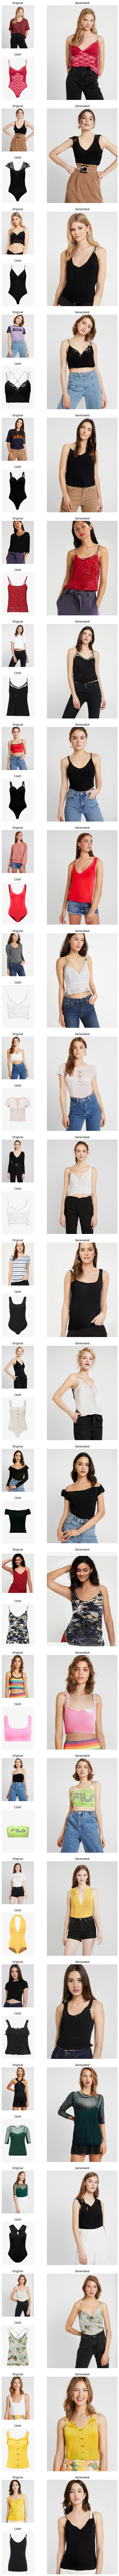

In [8]:
plt.figure(figsize=(10, 8 * len(image)))
grid = plt.GridSpec(2 * len(image), 3, wspace=0, hspace=0.2)

for idx in tqdm(range(len(image)), total=len(image), desc="Processing images"):
    img_ori = plt.imread(f"/kaggle/working/data/test/image/{image[idx]}")
    cloth = plt.imread(f"/kaggle/working/data/test/cloth/{clothes[idx]}")
    img_new = plt.imread(f"/kaggle/working/output/{image[idx][:-4]}_{clothes[idx][:-4]}.png", 0)

    plt.subplot(grid[2*idx, 0])
    plt.imshow(img_ori)
    plt.axis("off")
    plt.title("Original")

    plt.subplot(grid[2*idx + 1, 0])
    plt.imshow(cloth)
    plt.axis("off")
    plt.title("Cloth")

    plt.subplot(grid[2*idx:2*idx+2, 1:])
    plt.imshow(img_new)
    plt.axis("off")
    plt.title("Generated")

plt.show()